In [20]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import plotly.express as px
import plotly.graph_objs as go

In [2]:
AgeGroup = pd.read_csv('AgeGroupDetails.csv')
CovidIndia = pd.read_csv('covid_19_india.csv',parse_dates=True,squeeze=True)
HospitalBeds = pd.read_csv('HospitalBedsIndia.csv')
ICMRTesting = pd.read_csv('ICMRTestingDetails.csv')
IndividualDetails = pd.read_csv('IndividualDetails.csv')
PopulationCensus = pd.read_csv('population_india_census2011.csv')

In [3]:
indx_maxAgeGroup = AgeGroup['TotalCases'].idxmax()

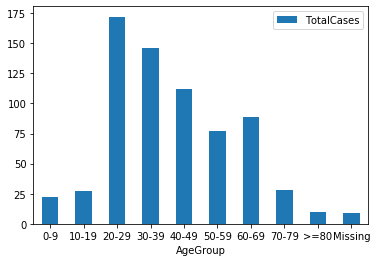

In [4]:
AgeGroupPlot = AgeGroup.plot.bar(x='AgeGroup', y='TotalCases', rot=0)

In [5]:
print('Age Group with maximum cases is {} with {} cases, constituting {} of total cases'.format(AgeGroup['AgeGroup'][indx_maxAgeGroup],AgeGroup['TotalCases'][indx_maxAgeGroup],AgeGroup['Percentage'][indx_maxAgeGroup]))

Age Group with maximum cases is 20-29 with 172 cases, constituting 24.86% of total cases


In [6]:
time = CovidIndia['Date']
ConfirmedCases = CovidIndia['Confirmed']
StateWiseData = CovidIndia.groupby(["State/UnionTerritory"])

In [7]:
now  = datetime.datetime.now()
CovidIndia['Date'] = pd.to_datetime(CovidIndia['Date'], format='%d/%m/%y')
Spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

In [8]:
CovidIndia['Date']

0     2020-01-30
1     2020-01-31
2     2020-02-01
3     2020-02-02
4     2020-02-03
         ...    
734   2020-04-07
735   2020-04-07
736   2020-04-07
737   2020-04-07
738   2020-04-07
Name: Date, Length: 739, dtype: datetime64[ns]

In [9]:
CovidIndia.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [10]:
CovidIndia=CovidIndia[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

In [11]:
graph = CovidIndia.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
graph['Date']

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
        ...    
64   2020-04-03
65   2020-04-04
66   2020-04-05
67   2020-04-06
68   2020-04-07
Name: Date, Length: 69, dtype: datetime64[ns]

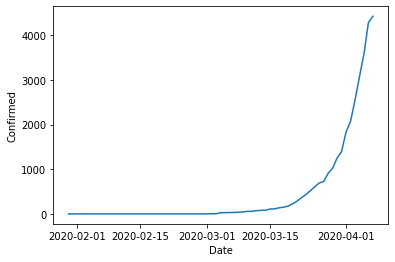

In [12]:
sns.lineplot(graph['Date'],graph['Confirmed'])

In [29]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=True)
fig = px.area(spread, x="Date", y="Confirmed",color='State/UnionTerritory',title='State Wise Spread over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

In [30]:
spread

,Date,State/UnionTerritory,Confirmed
0,2020-01-30,Kerala,1
176,2020-03-16,Uttarakhand,1
177,2020-03-17,Andhra Pradesh,1
518,2020-03-31,Mizoram,1
99,2020-03-11,Jammu and Kashmir,1
...,...,...,...
685,2020-04-06,Delhi,523
703,2020-04-06,Tamil Nadu,571
733,2020-04-07,Tamil Nadu,621
696,2020-04-06,Maharashtra,748


In [24]:
fig = px.area(spread, x="Date", y="Cured",color='State/UnionTerritory',title='State Wise Spread over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Date', 'State/UnionTerritory', 'Confirmed'] but received: Cured